In [227]:
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [228]:
(X_train,y_train),(X_test,y_test)=tf.keras.datasets.mnist.load_data()

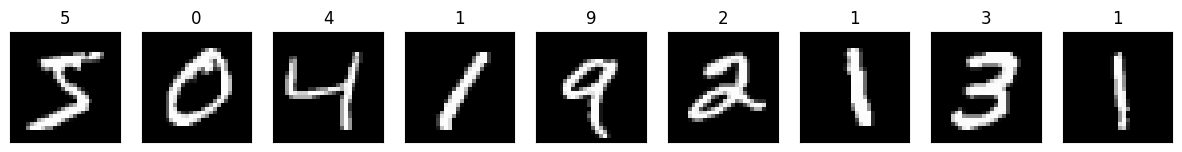

In [229]:
fig, axes = plt.subplots(ncols=9, sharex=False, sharey=True, figsize=(15, 4))
for i in range(9):
    axes[i].set_title(y_train[i])
    axes[i].imshow(X_train[i], cmap='gray')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()

In [216]:
# reshaping data to common shape for cnn, and normalizing
X_train = X_train.reshape((60000, 28, 28, 1)).astype('float32') / 255
X_test = X_test.reshape((10000, 28, 28, 1)).astype('float32') / 255

In [217]:
# hot one encoding
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [218]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import layers, models

In [219]:
model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [231]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 flatten_3 (Flatten)         (None, 576)             

In [220]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [223]:
model.fit(X_train, y_train, epochs=20, batch_size=128, validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 6s 17ms/step - loss: 0.2860 - accuracy: 0.9142 - val_loss: 0.0912 - val_accuracy: 0.9722
Epoch 2/20
375/375 [==============================] - 6s 16ms/step - loss: 0.0679 - accuracy: 0.9786 - val_loss: 0.0650 - val_accuracy: 0.9810
Epoch 3/20
375/375 [==============================] - 6s 16ms/step - loss: 0.0477 - accuracy: 0.9850 - val_loss: 0.0477 - val_accuracy: 0.9863
Epoch 4/20
375/375 [==============================] - 6s 17ms/step - loss: 0.0365 - accuracy: 0.9886 - val_loss: 0.0439 - val_accuracy: 0.9874
Epoch 5/20
375/375 [==============================] - 6s 17ms/step - loss: 0.0286 - accuracy: 0.9906 - val_loss: 0.0424 - val_accuracy: 0.9869
Epoch 6/20
375/375 [==============================] - 7s 19ms/step - loss: 0.0256 - accuracy: 0.9913 - val_loss: 0.0445 - val_accuracy: 0.9872
Epoch 7/20
375/375 [==============================] - 7s 17ms/step - loss: 0.0204 - accuracy: 0.9936 - val_loss: 0.0554 - val_accuracy: 0.9836

In [224]:
score = model.evaluate(x=X_test, y=y_test, verbose=0)
print("Test score:", score[0])
print("Test accuracy:", score[1])

Test score: 0.040578100830316544
Test accuracy: 0.9909999966621399
